##Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import  mean_squared_error
import lightgbm as lgb

##Importing dataset

In [2]:
train = pd.read_csv('drive/MyDrive/Colab Notebooks/hackathon/train_E1GspfA.csv')
test = pd.read_csv('drive/MyDrive/Colab Notebooks/hackathon/test_6QvDdzb.csv')
submit = pd.read_csv('drive/MyDrive/Colab Notebooks/hackathon/sample_4E0BhPN.csv')

In [3]:
df = train.copy()

In [4]:
df.head()

,date,hour,demand
0,2018-08-18,9,91
1,2018-08-18,10,21
2,2018-08-18,13,23
3,2018-08-18,14,104
4,2018-08-18,15,81


##Feature Engineering

In [5]:
 # Extract date feature
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].apply(lambda x: x.year)
df['month'] = df['date'].apply(lambda x: x.month)
df['day'] = df['date'].apply(lambda x: x.day)
df['day_of_week'] = df['date'].apply(lambda x: x.dayofweek)
df['is_quarter_date'] = df['date'].apply(lambda x: x.quarter)
df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x>4 else 0)

df.drop(['date'], axis=1, inplace=True)

In [6]:
df.head()

,hour,demand,year,month,day,day_of_week,is_quarter_date,is_weekend
0,9,91,2018,8,18,5,3,1
1,10,21,2018,8,18,5,3,1
2,13,23,2018,8,18,5,3,1
3,14,104,2018,8,18,5,3,1
4,15,81,2018,8,18,5,3,1


In [7]:
# Extract date feature for test
test['date'] = pd.to_datetime(test['date'])
test['year'] = test['date'].apply(lambda x: x.year)
test['month'] = test['date'].apply(lambda x: x.month)
test['day'] = test['date'].apply(lambda x: x.day)
test['day_of_week'] = test['date'].apply(lambda x: x.dayofweek)
test['is_quarter_date'] = test['date'].apply(lambda x: x.quarter)
test['is_weekend'] = test['day_of_week'].apply(lambda x: 1 if x>4 else 0)

test.drop(['date'], axis=1, inplace=True)

In [8]:
test.head()

,hour,year,month,day,day_of_week,is_quarter_date,is_weekend
0,0,2021,3,1,0,1,0
1,1,2021,3,1,0,1,0
2,2,2021,3,1,0,1,0
3,3,2021,3,1,0,1,0
4,5,2021,3,1,0,1,0


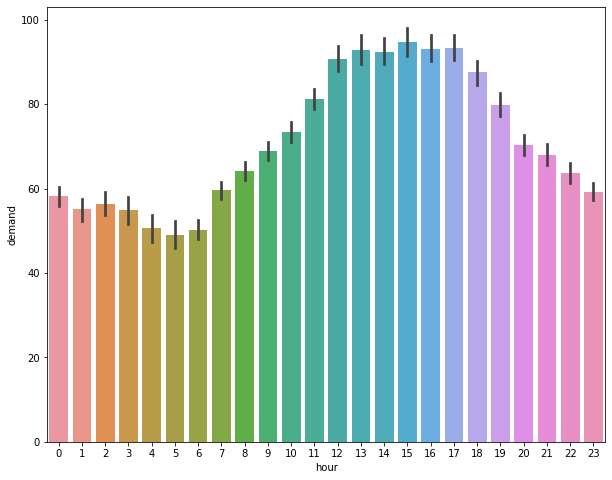

In [9]:
plt.figure(figsize=(10,8))
sns.barplot(x=df['hour'], y=df['demand'])

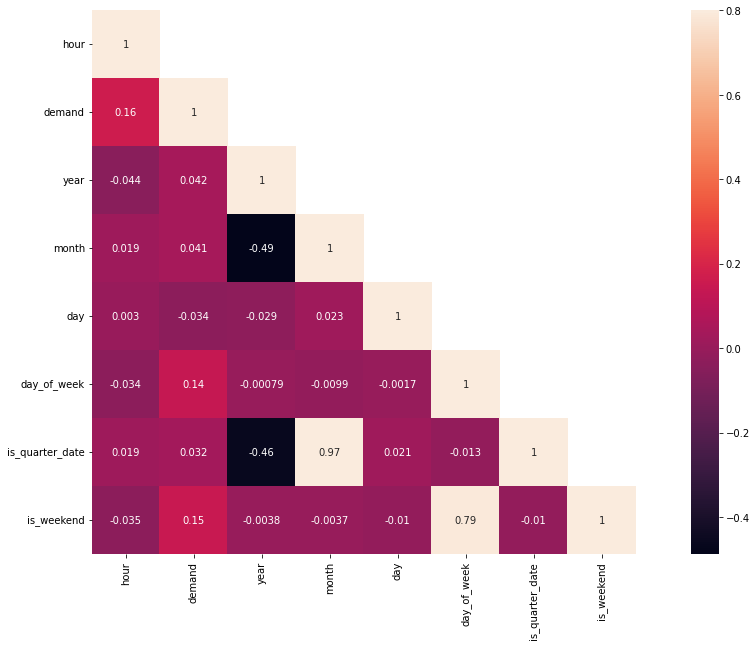

In [10]:
# Checking the Correlation Between the Independent Variables

corr = df.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corr, mask=mask,vmax=.8, square=True,annot=True)

##Modelling

In [11]:
#split df into X & y
y = df['demand'].copy()
X = df.drop('demand', axis=1).copy()

In [12]:
# Splitting data Into Training and Testing Set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=41)

In [13]:
regressor = RandomForestRegressor(criterion='mse', random_state=123, max_depth=15, n_estimators=1000,min_samples_leaf=4, min_samples_split=2)

In [14]:
regressor.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


RandomForestRegressor(criterion='mse', max_depth=15, min_samples_leaf=4,
                      n_estimators=1000, random_state=123)

In [15]:
y_pred = regressor.predict(x_test)

In [16]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
rmse

32.56341246485542

In [17]:
gbm = lgb.LGBMRegressor(objective='regression', num_leaves=89,learning_rate=0.1,max_bin=200,min_sum_hessian_in_leaf = 20,
                        max_depth= 18,verbose=-1)

In [18]:
gbm.fit(x_train, y_train,eval_set=[(x_test, y_test)], eval_metric='l2_root', early_stopping_rounds=100)

[1]	valid_0's rmse: 39.7011	valid_0's l2: 1576.17
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's rmse: 38.4293	valid_0's l2: 1476.81
[3]	valid_0's rmse: 37.4123	valid_0's l2: 1399.68
[4]	valid_0's rmse: 36.5771	valid_0's l2: 1337.88
[5]	valid_0's rmse: 35.6774	valid_0's l2: 1272.87
[6]	valid_0's rmse: 35.1078	valid_0's l2: 1232.55
[7]	valid_0's rmse: 34.5828	valid_0's l2: 1195.97
[8]	valid_0's rmse: 34.0662	valid_0's l2: 1160.51
[9]	valid_0's rmse: 33.6527	valid_0's l2: 1132.51
[10]	valid_0's rmse: 33.316	valid_0's l2: 1109.96
[11]	valid_0's rmse: 33.143	valid_0's l2: 1098.46
[12]	valid_0's rmse: 32.9068	valid_0's l2: 1082.86
[13]	valid_0's rmse: 32.6757	valid_0's l2: 1067.7
[14]	valid_0's rmse: 32.5697	valid_0's l2: 1060.78
[15]	valid_0's rmse: 32.4448	valid_0's l2: 1052.66
[16]	valid_0's rmse: 32.3074	valid_0's l2: 1043.77
[17]	valid_0's rmse: 32.1948	valid_0's l2: 1036.5
[18]	valid_0's rmse: 32.0696	valid_0's l2: 1028.46
[19]	valid_0's rmse: 32.0382	val

LGBMRegressor(max_bin=200, max_depth=18, min_sum_hessian_in_leaf=20,
              num_leaves=89, objective='regression', verbose=-1)

In [19]:
y_pred = gbm.predict(x_test, num_iteration=gbm.best_iteration_)

In [20]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
rmse

31.32790332774308

##Predicting

In [21]:
predict = gbm.predict(test)

In [22]:
rounded = [round(x) for x in predict]
predict = rounded

In [23]:
submit['demand'] = predict

In [24]:
submit.head()

,date,hour,demand
0,2021-03-01,0,57
1,2021-03-01,1,55
2,2021-03-01,2,55
3,2021-03-01,3,55
4,2021-03-01,5,54
